In [26]:
import numpy as np
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler
from scipy import stats
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)
from statsmodels.sandbox.stats.multicomp import TukeyHSDResults

In [2]:
def Henon(n):
    a = 1.4
    b = 0.3
    x = np.zeros((n+1))
    y = np.zeros((n+1))
    for i in range(n):
        x[i+1] = 1-a*x[i]*x[i] + y[i]
        y[i+1] = b*x[i]
    return (x,y)

In [3]:
def Ventanas(x,size):
    size += 1
    arr = np.empty((0,size))
    for i in range(len(x) - size):
        arr = np.vstack((arr,x[i:i + size]))
    return (arr[:,:-1],arr[:,-1])

In [5]:
Xinicial,_ = Henon(100)
X,y = Ventanas(Xinicial,25)

**Estandarizamos los datos**

In [6]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = (y - np.mean(y))/np.std(y)


In [7]:
kf = KFold(n_splits=10,shuffle=True)
resultados_train = []
resultados_test = []
model = []
res_train = np.empty((30,0))
res_test = np.empty((30,0))
test_indices = []
etiquetas = []
dicc = [{'kernel': 'rbf','tol': 0.1,'gamma':'auto'}]

for i in range(len(dicc)):
    test_indices2 = []
    for j in range(3):
        for train_index, test_index in kf.split(X):
    #         train_test_split del conjunto train y pillar 1/9 para validación
            X_train, X_test,y_train, y_test = X[train_index],X[test_index],y[train_index],y[test_index]
            
            test_indices2.append(test_index)
    #         print('X_train: {}\n, X_valid: {}\n, X_test: {}'.format(X_train, X_valid, X_test))
            alg = SVR(**dicc[i])
            alg.fit(X_train, y_train)
            model.append(alg)
            y_pred_test = alg.predict(X_test)
            y_pred_train = alg.predict(X_train)
            resultados_train.append(mean_squared_error(y_train,y_pred_train))
            resultados_test.append(mean_squared_error(y_test,y_pred_test))
    
    res_train = np.hstack((res_train, np.array(resultados_train,ndmin=2).T))
    res_test = np.hstack((res_test, np.array(resultados_test,ndmin=2).T))
    resultados_train = []
    resultados_test = []
    test_indices.append(test_indices2)

    
            

## Entrenamiento de Modelos

**kFold - Support Vector Regression**

In [18]:
%%time
kf = KFold(n_splits=10,shuffle=True)
resultados_train = []
resultados_test = []
model = []
res_train = np.empty((30,0))
res_test = np.empty((30,0))
test_indices = []
etiquetas = []
# dicc = [{'kernel': 'rbf','tol': 0.1,'gamma':'auto'}]
etiquetas.extend(['SVR linear C1',
             'SVR poly 2º C1',
             'SVR poly 3º C1',
             'SVR poly 4º C1',
             'SVR rfb auto C1',
             'SVR rfb 0.05 C1',
             'SVR rfb 0.1 C1',
             'SVR rfb 0.2 C1'])
# etiquetas.extend(['SVR linear C100',
#              'SVR poly 2º C100',
#              'SVR poly 3º C100',
#              'SVR poly 4º C100',
#              'SVR rfb auto C100',
#              'SVR rfb 0.05 C100',
#              'SVR rfb 0.1 C100',
#              'SVR rfb 0.2 C100'])
dicc = [{'C': 1.0, 'kernel': 'linear', 'degree': 1, 'gamma': 'auto', 'tol': 0.1},
        {'C': 1.0, 'kernel': 'poly', 'degree': 2, 'gamma': 'auto', 'tol': 0.1},
        {'C': 1.0, 'kernel': 'poly', 'degree': 3, 'gamma': 'auto', 'tol': 0.1},
        {'C': 1.0, 'kernel': 'poly', 'degree': 4, 'gamma': 'auto', 'tol': 0.1},
        {'C': 1.0, 'kernel': 'rbf', 'degree': 2, 'gamma': 'auto', 'tol': 0.1},
        {'C': 1.0, 'kernel': 'rbf', 'degree': 2, 'gamma': 0.05, 'tol': 0.1},
        {'C': 1.0, 'kernel': 'rbf', 'degree': 2, 'gamma': 0.1, 'tol': 0.1},
        {'C': 1.0, 'kernel': 'rbf', 'degree': 2, 'gamma': 0.2, 'tol': 0.1}]

for i in range(len(dicc)):
    test_indices2 = []
    for j in range(3):
        for train_index, test_index in kf.split(X):
            X_train, X_test,y_train, y_test = X[train_index],X[test_index],y[train_index],y[test_index]
            test_indices2.append(test_index)
            alg = SVR(**dicc[i])
            alg.fit(X_train, y_train)
            model.append(alg)
            y_pred_test = alg.predict(X_test)
            y_pred_train = alg.predict(X_train)
            resultados_train.append(mean_squared_error(y_train,y_pred_train))
            resultados_test.append(mean_squared_error(y_test,y_pred_test))
    res_train = np.hstack((res_train, np.array(resultados_train,ndmin=2).T))
    res_test = np.hstack((res_test, np.array(resultados_test,ndmin=2).T))
    resultados_train = []
    resultados_test = []
    test_indices.append(test_indices2)

Wall time: 310 ms


**kFold - Multi-layer Perceptron Regressor**

In [19]:
%%time
etiquetas.extend(['MLPR sgd 20',
             'MLPR sgd 25',
             'MLPR sgd 30',
             'MLPR adam 20',
             'MLPR adam 25',
             'MLPR adam 30'])
dicc = [{'hidden_layer_sizes': (20,), 'solver': 'sgd', 'early_stopping': True, 'max_iter': 1500},
        {'hidden_layer_sizes': (25,), 'solver': 'sgd', 'early_stopping': True, 'max_iter': 1500},
        {'hidden_layer_sizes': (30,), 'solver': 'sgd', 'early_stopping': True, 'max_iter': 1500},
        {'hidden_layer_sizes': (20,), 'solver': 'adam', 'early_stopping': True, 'max_iter': 1500},
        {'hidden_layer_sizes': (25,), 'solver': 'adam', 'early_stopping': True, 'max_iter': 1500},
        {'hidden_layer_sizes': (30,), 'solver': 'adam', 'early_stopping': True, 'max_iter': 1500}]

for i in range(len(dicc)):
    test_indices2 = []
    for j in range(3):
        for train_index, test_index in kf.split(X):
            X_train, X_test,y_train, y_test = X[train_index],X[test_index],y[train_index],y[test_index]
            test_indices2.append(test_index)
            alg = MLPRegressor(**dicc[i])
            alg.fit(X_train, y_train)
            model.append(alg)
            y_pred_test = alg.predict(X_test)
            y_pred_train = alg.predict(X_train)
            resultados_train.append(mean_squared_error(y_train,y_pred_train))
            resultados_test.append(mean_squared_error(y_test,y_pred_test))
    res_train = np.hstack((res_train, np.array(resultados_train,ndmin=2).T))
    res_test = np.hstack((res_test, np.array(resultados_test,ndmin=2).T))
    resultados_train = []
    resultados_test = []
    test_indices.append(test_indices2)

C:\Users\iago_\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\iago_\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Wall time: 26.6 s


**Test de normalidad**  
Rechazamos normalidad, podriamos asumir normalidad en alguno de ellos pero como en algunos no, realizamos el test no paramétrico de Kruskal-Wallis en lugar de un Anova 

In [23]:
np.apply_along_axis(lambda x: stats.shapiro(x)[1], axis=0, arr=res_test)

array([2.42951289e-01, 8.44048858e-02, 2.22680941e-01, 6.34279311e-01,
       3.44507575e-01, 5.61316870e-03, 2.55777296e-02, 6.32748194e-03,
       2.66219932e-03, 4.54629597e-04, 4.23761427e-01, 7.55169749e-01,
       2.53370926e-02, 2.07420792e-02])

**Test de Kruskal-Wallis**  
Rechazamos que las precisiones sean similares

In [24]:
print(stats.kruskal(*zip(*list(res_test))))

KruskalResult(statistic=78.13065942766661, pvalue=2.4756778016538105e-11)


In [32]:
labels = [etiquetas[i] for i in range(res_test.shape[1]) for _ in range(res_test.shape[0])]
arr_test = res_test.flatten('F')
resultados = pairwise_tukeyhsd(arr_test,labels)
# resultados.summary()

In [28]:
#seleccionamos el que tiene mejor media y vemos en el anterior cuales son iguales
best_group = np.argmax(np.mean(res_test, axis = 0))
best_group = etiquetas[int(best_group)]

Figure(720x432)


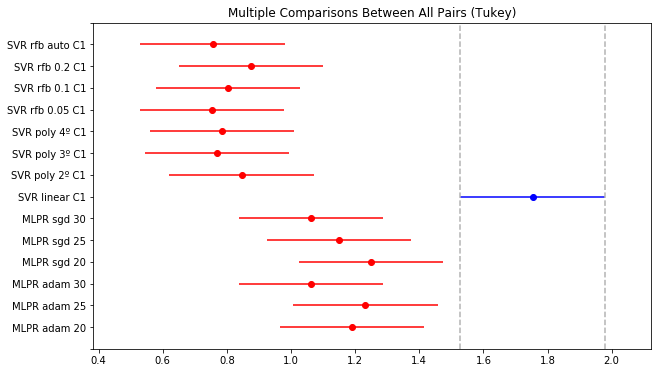

In [30]:
print(resultados.plot_simultaneous(comparison_name=best_group))